**Practical 4:**

Area of interest: Eastern boundary of the Antarctic peninsula 

*Plot 1*

A large figure with the map of the region bathymetry, using an adequate colormap. 

In [12]:
#Importing all the necessary programs:
import matplotlib.pyplot as plt
import matplotlib.colors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
import cmocean
import numpy as np
import xarray as xr
import io 
import zipfile
import requests
import glob
import os
import gzip
import shutil
from matplotlib.colors import TwoSlopeNorm
from matplotlib.colors import LogNorm
import matplotlib.ticker as mticker


Below, is the code for loading the bathymetry data, viewing and then generating the plot. 

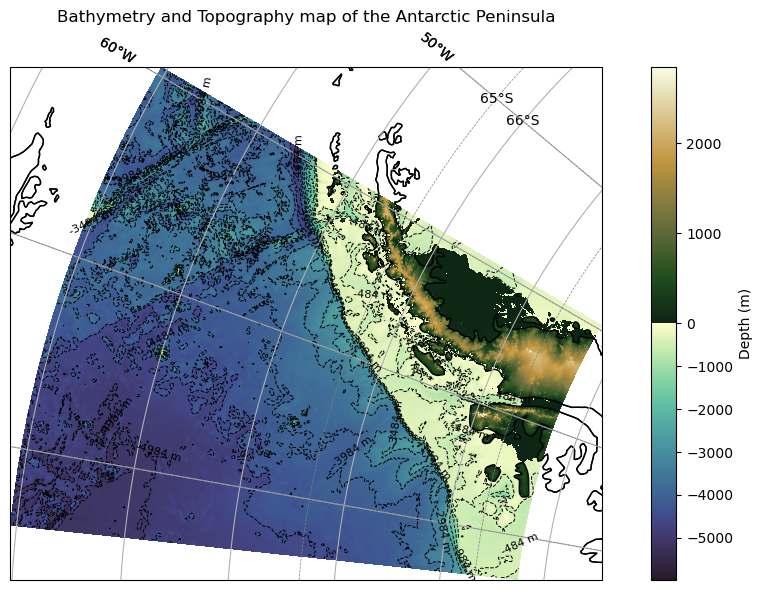

In [15]:
# Load the bathymetry dataset
bathy = xr.open_dataset('GMRTv4_3_0_20250318topo (1).grd')

# Extract data
lon = bathy['lon']  
lat = bathy['lat']  
bathymetry = bathy['altitude']  # negative for ocean, positive for land

# Colour normalization with zero (sea level) as the midpoint
vmin, vmax = float(bathymetry.min()), float(bathymetry.max())
midpoint = 0  # Sea level at 0m

norm = TwoSlopeNorm(vmin=vmin, vcenter=midpoint, vmax=vmax)  # Normalize to highlight sea level

# Contrast for land and sea
cmap = cmocean.cm.topo  # balance also works nicely

# Creating figure with correct projection initialization
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.SouthPolarStereo()})

# Plot bathymetry and land elevation
pcm = ax.pcolormesh(lon, lat, bathymetry, cmap=cmap, norm=norm, transform=ccrs.PlateCarree())

# Add bathymetry contours
contour = ax.contour(lon, lat, bathymetry, levels=np.arange(vmin, 0, 500),
                      colors="black", linewidths=0.7, transform=ccrs.PlateCarree())
ax.clabel(contour, fmt='%d m', colors='black', fontsize=8)  # Contour labels

# Add map features
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='none')
ax.coastlines()
ax.gridlines(draw_labels=True)

#Adding contours
gl = ax.gridlines(draw_labels=True, linestyle="--", linewidth=0.5, color="gray")
gl.ylocator = mticker.FixedLocator(np.arange(-90, -60, 5)) 


# Colorbar
cbar = plt.colorbar(pcm, ax=ax, orientation='vertical', label='Depth / Elevation (m)')
cbar.set_label("Depth (m)")
# Elevation is positive for land, negative for depth (ocean)

# Title
plt.title("Bathymetry and Topography map of the Antarctic Peninsula")
plt.tight_layout()  
plt.savefig("plot1.jpg", dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

#Add why this projection, and why it looks like this 

*Plot 2:*

In [138]:
#Loading the chlorophyll data:
chl_data = xr.open_dataset("/Users/chloelevey/Documents/LVYCHL001-SCDM25/P4/ESACCI-OC-MAPPED-CLIMATOLOGY-1M_MONTHLY_4km_PML_CHL-fv5.0.nc")

print(chl_data)

<xarray.Dataset>
Dimensions:  (time: 12, lon: 8640, lat: 4320)
Coordinates:
  * time     (time) datetime64[ns] 1998-01-01 1998-02-01 ... 1997-12-01
  * lon      (lon) float64 -180.0 -179.9 -179.9 -179.9 ... 179.9 179.9 180.0
  * lat      (lat) float64 89.98 89.94 89.9 89.85 ... -89.85 -89.9 -89.94 -89.98
Data variables:
    crs      int32 ...
    chlor_a  (time, lat, lon) float32 ...
Attributes: (12/53)
    CDI:                               Climate Data Interface version ?? (htt...
    history:                           Tue Apr 27 20:27:21 2021: cdo selvar,c...
    source:                            NASA SeaWiFS  L1A and L2 R2018.0 LAC a...
    institution:                       Plymouth Marine Laboratory
    Conventions:                       CF-1.7
    Metadata_Conventions:              Unidata Dataset Discovery v1.0
    ...                                ...
    time_coverage_start:               199801010000Z
    time_coverage_end:                 202001312359Z
    id:            

In [24]:
chl_data.coords['time']

<xarray.DataArray 'time' (time: 12)>
array(['1998-01-01T00:00:00.000000000', '1998-02-01T00:00:00.000000000',
       '1998-03-01T00:00:00.000000000', '1998-04-01T00:00:00.000000000',
       '1998-05-01T00:00:00.000000000', '1998-06-01T00:00:00.000000000',
       '1998-07-01T00:00:00.000000000', '1998-08-01T00:00:00.000000000',
       '1997-09-04T00:00:00.000000000', '1997-10-01T00:00:00.000000000',
       '1997-11-01T00:00:00.000000000', '1997-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1998-01-01 1998-02-01 ... 1997-12-01
Attributes:
    standard_name:  time
    axis:           T

In [26]:
da_chl_data = chl_data['chlor_a'] 

<xarray.DataArray 'chlor_a' ()>
array(0.001) <xarray.DataArray 'chlor_a' ()>
array(99.48895264) <xarray.DataArray 'chlor_a' ()>
array(0.40058345, dtype=float32)
<xarray.DataArray 'chlor_a' (lat: 4320, lon: 8640)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lon      (lon) float64 -180.0 -179.9 -179.9 -179.9 ... 179.9 179.9 180.0
  * lat      (lat) float64 89.98 89.94 89.9 89.85 ... -89.85 -89.9 -89.94 -89.98
{'standard_name': 'mass_concentration_of_chlorophyll_a_in_sea_water', 'long_name': 'Chlorophyll-a concentration in seawater (not log-transformed), generated by as a blended combination of OCI, OCI2, OC2 and OCx algorithms, depending on water class memberships', 'units': 'milligram m-3', 'grid_mapping': 'crs', 'ancillary_va

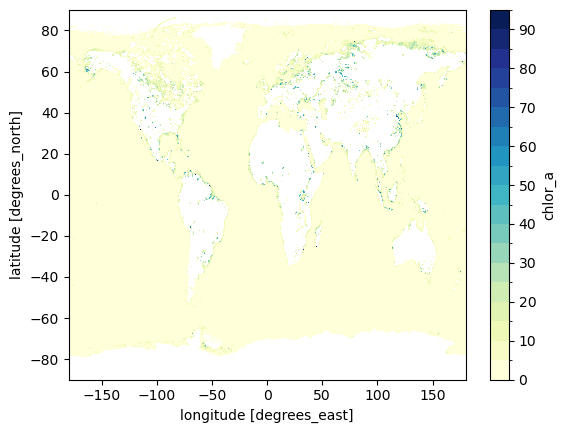

In [28]:
print(da_chl_data.min(),da_chl_data.max(),da_chl_data.mean())

#making an array for the mean: 
da_chl_mean = da_chl_data.mean(dim='time') 
print(da_chl_mean)

da_chl_mean.plot.contourf(levels=np.arange(0.,100.,5.),cmap='YlGnBu')

print(da_chl_data.attrs)

In [42]:
#Log transforming the data:
da_chl_log = np.log(da_chl_data)
print(da_chl_log)

<xarray.DataArray 'chlor_a' (time: 12, lat: 4320, lon: 8640)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, na

In [43]:
# Define extent as numerical values
extent = [85, 60, -58, -70]

da_chl_masked = da_chl_mean.where(~np.isnan(da_chl_mean))

# Selecting data (ensure latitude is from high to low)
da_ant_chl = da_chl_masked.sel(lon=slice(extent[0], extent[1]), lat=slice(extent[2], extent[3]))

# Check if data selection is empty
print(da_ant_chl)


<xarray.DataArray 'chlor_a' (lat: 288, lon: 0)>
array([], shape=(288, 0), dtype=float32)
Coordinates:
  * lon      (lon) float64 
  * lat      (lat) float64 -58.02 -58.06 -58.1 -58.15 ... -69.9 -69.94 -69.98


In [46]:
print(da_chl_mean.lon.values)
da_chlor_a_mean_subset = da_chl_mean.sel(lat=slice(-58, -70), lon=slice(60, 85))
print(da_chlor_a_mean_subset)  

[-179.97916667 -179.9375     -179.89583333 ...  179.89583333  179.9375
  179.97916667]
<xarray.DataArray 'chlor_a' (lat: 288, lon: 600)>
array([[0.15401313, 0.15332167, 0.15332167, ..., 0.30991843, 0.30991843,
        0.30149266],
       [0.1581409 , 0.1564616 , 0.1564616 , ..., 0.3228108 , 0.3228108 ,
        0.30899987],
       [0.16002566, 0.16814779, 0.16814779, ..., 0.38267475, 0.38267475,
        0.34352672],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]], dtype=float32)
Coordinates:
  * lon      (lon) float64 60.02 60.06 60.1 60.15 ... 84.85 84.9 84.94 84.98
  * lat      (lat) float64 -58.02 -58.06 -58.1 -58.15 ... -69.9 -69.94 -69.98


<xarray.DataArray 'chlor_a' (lat: 4320, lon: 8640)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lon      (lon) float64 -180.0 -179.9 -179.9 -179.9 ... 179.9 179.9 180.0
  * lat      (lat) float64 89.98 89.94 89.9 89.85 ... -89.85 -89.9 -89.94 -89.98


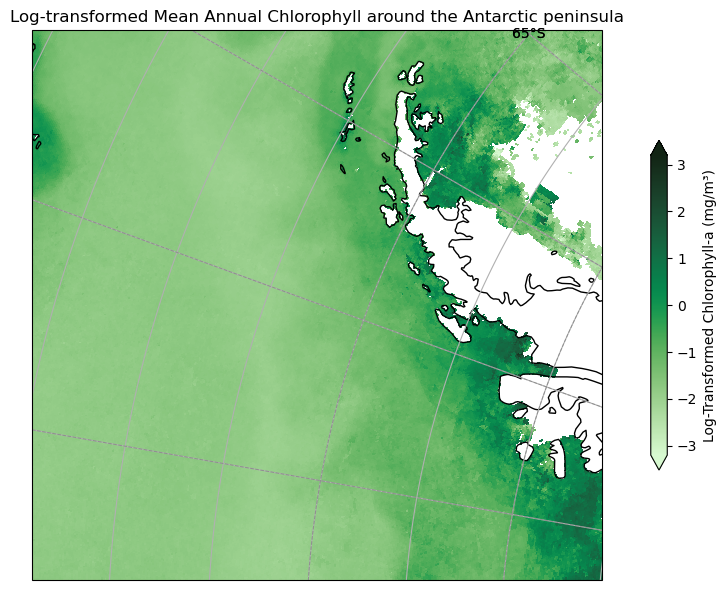

In [48]:
# Doing the same with the log transformed data 
#Making log mean:
da_chl_log_mean = da_chl_log.mean(dim='time') 
print(da_chl_log_mean)

extent = [-60, -85, -58, -70]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

# Mask NaNs to avoid plotting errors
da_chl_log_mean_masked = da_chl_log_mean.where(~np.isnan(da_chl_log_mean))

# Create figure and axis
fig, axis = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.SouthPolarStereo()})

# Plot chlorophyll data with NaN handling
da_chl_log_mean_masked.plot(ax=axis, transform=ccrs.PlateCarree(),cmap=cmocean.cm.algae, 
                            cbar_kwargs={'orientation': 'vertical', 'shrink': 0.6,'label': 'Log-Transformed Chlorophyll-a (mg/m³)'}, robust = True)

# Add coastlines and gridlines
axis.set_extent(extent, crs=ccrs.PlateCarree())
axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.right_labels = False
gl.top_labels = False

gl = axis.gridlines(draw_labels=True, linestyle="--", linewidth=0.7, color="gray", alpha=0.7)
gl.xlocator = mticker.FixedLocator(np.arange(-180, 180, 10))  # Longitude every 10°
gl.ylocator = mticker.FixedLocator(np.arange(-90, -60, 5))    # Latitude every 5°
gl.right_labels = False  # Remove right-side labels
gl.top_labels = False 


plt.title("Log-transformed Mean Annual Chlorophyll around the Antarctic peninsula")
plt.tight_layout()
plt.savefig("plot2.jpg", dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

*Plot 3:*

In [50]:
#Checking data for time dimension and grouping: 
print(da_chl_log)
monthly_mean_chl = da_chl_log.groupby('time.month').mean()

<xarray.DataArray 'chlor_a' (time: 12, lat: 4320, lon: 8640)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, na

In [51]:
print(monthly_mean_chl)


<xarray.DataArray 'chlor_a' (month: 12, lat: 4320, lon: 8640)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, n

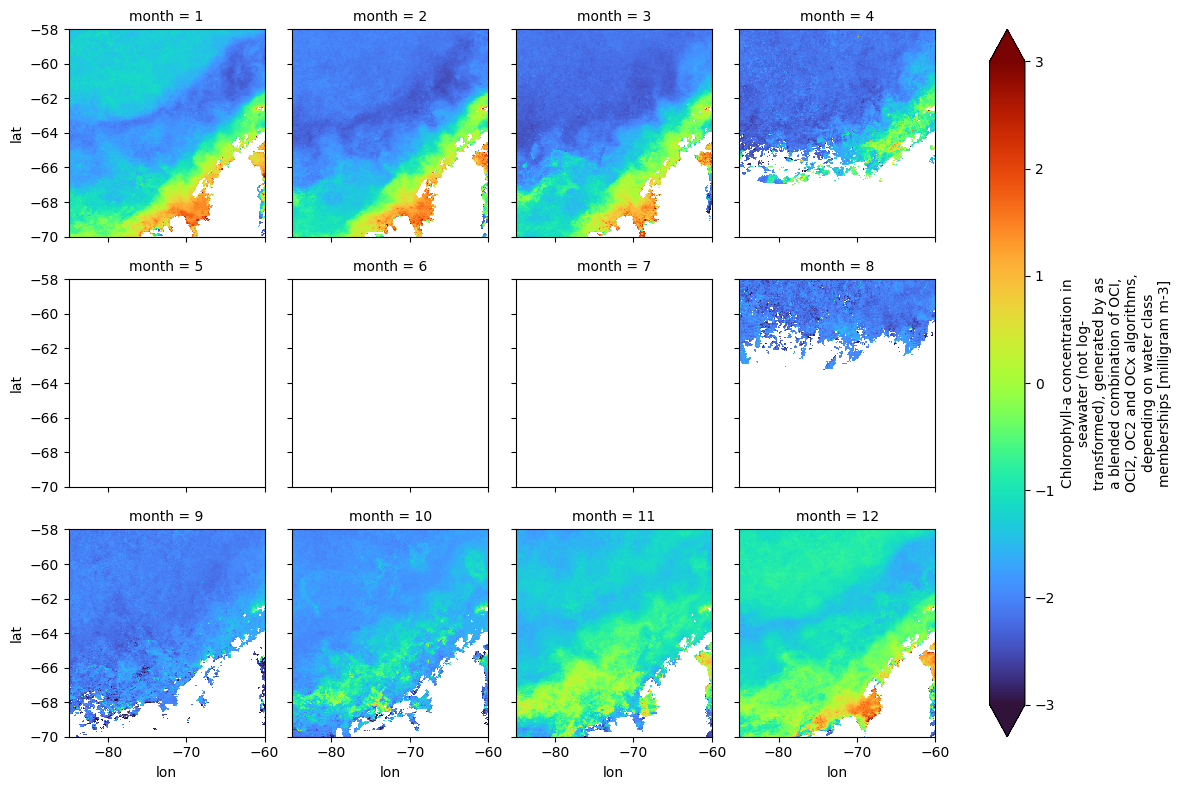

In [52]:
#Plotting
region_extent = dict(lon=slice(-85, -60), lat=slice(-58, -70))  # Ensure lat slice is in descending order
monthly_mean_chl_region = monthly_mean_chl.sel(**region_extent)

monthly_mean_chl_region.plot(
    col='month', 
    col_wrap=4,  # Adjust this for better layout (e.g., 4 columns)
    cmap='turbo', 
    vmin=-3., 
    vmax=3.,
    figsize=(12, 8)  # Adjust figure size if needed
)

In [53]:
monthly_mean_chl = da_chl_log.groupby('time.month').mean()

In [54]:
month_names = [
    "January", "February", "March", "April", "May", "June", 
    "July", "August", "September", "October", "November", "December"
]

monthly_mean_chl = monthly_mean_chl.assign_coords(month=("month", month_names))


In [55]:
region_extent = dict(lon=slice(-85, -60), lat=slice(-58, -70))  # lat is in descending order
monthly_mean_chl_region = monthly_mean_chl.sel(**region_extent)


<Figure size 1200x1000 with 0 Axes>

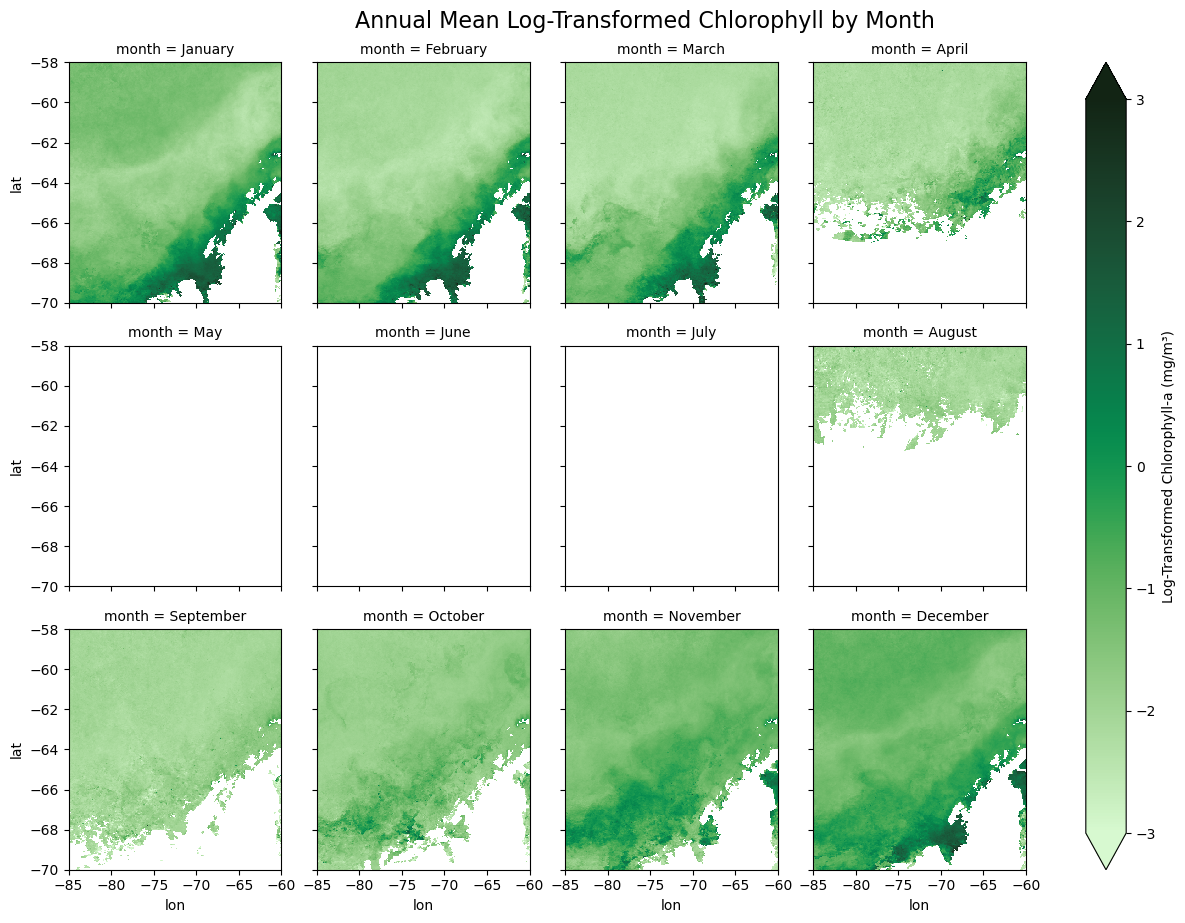

In [56]:
fig = plt.figure(figsize=(12, 10))

monthly_mean_chl_region.plot(
    col='month', col_wrap=4, cmap=cmocean.cm.algae, vmin=-3., vmax=3., cbar_kwargs={'label': 'Log-Transformed Chlorophyll-a (mg/m³)'}  # Custom label

)

# Manually set titles
for i, ax in enumerate(fig.axes):
    ax.set_title(month_names[i])  # Assign month names as titles

plt.suptitle("Annual Mean Log-Transformed Chlorophyll by Month", fontsize=16, y=1.02)  
plt.savefig("plot3.jpg",dpi=300)
plt.show()

/var/folders/w8/mpdvw0cn1n310fwby2rvy00m0000gn/T/ipykernel_1641/217753879.py:11: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.
  for ax, name in zip(g.axes.flat, month_names):


<Figure size 1200x1000 with 0 Axes>

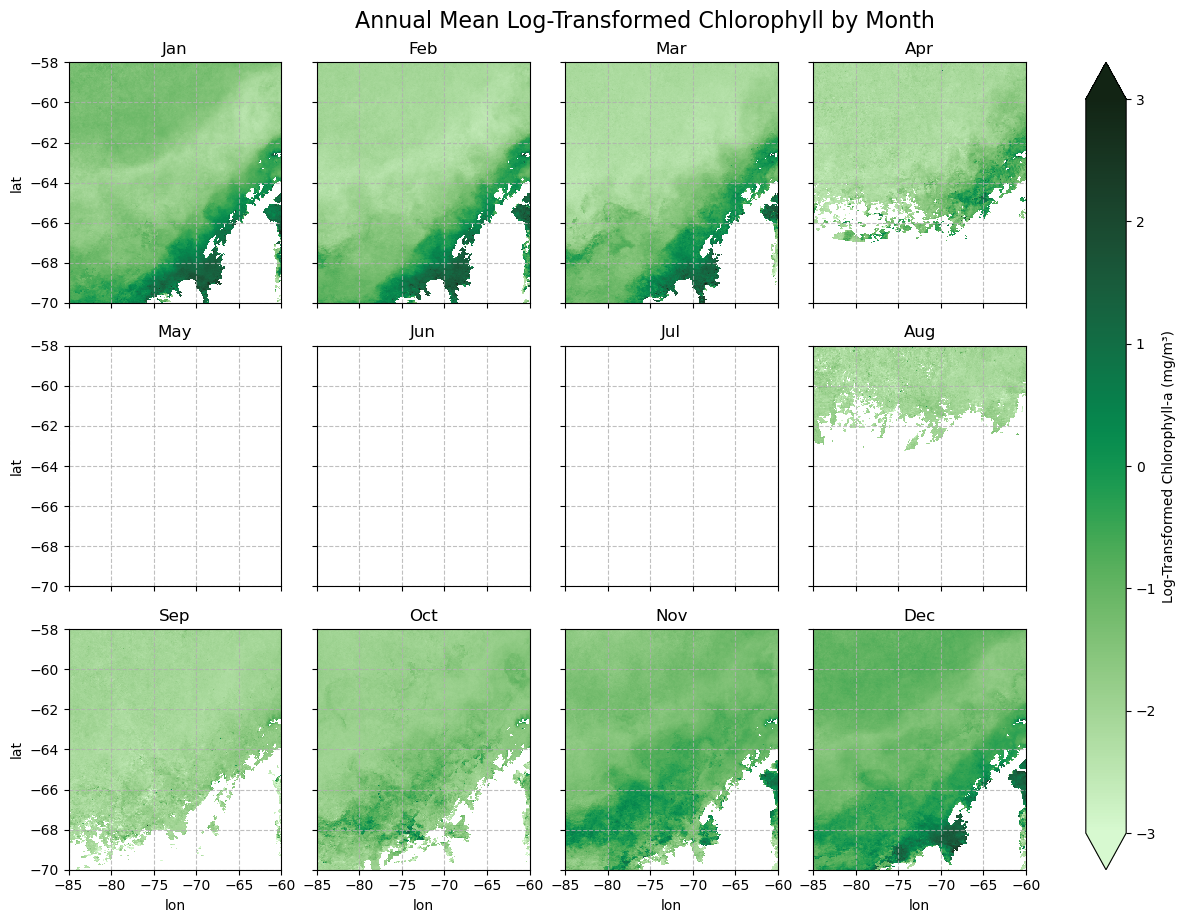

In [168]:
import matplotlib.pyplot as plt
import cmocean

fig = plt.figure(figsize=(12, 10))

g = monthly_mean_chl_region.plot(
    col='month', col_wrap=4, cmap=cmocean.cm.algae, vmin=-3., vmax=3.,
    cbar_kwargs={'label': 'Log-Transformed Chlorophyll-a (mg/m³)'})

# Loop through each axis in the FacetGrid to set titles and gridlines
for ax, name in zip(g.axes.flat, month_names):
    ax.set_title(name)
    ax.grid(True, linestyle='--', alpha=0.8)  # Add gridlines

plt.suptitle("Annual Mean Log-Transformed Chlorophyll by Month", fontsize=16, y=1.02)  
plt.savefig("plot3.jpg", dpi=300)
plt.show()


*Plot 4:*

In [58]:
print(monthly_mean_chl)

<xarray.DataArray 'chlor_a' (month: 12, lat: 4320, lon: 8640)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, n

ValueError: x and y can be no greater than 2D, but have shapes (12,) and (12, 4320, 8640)

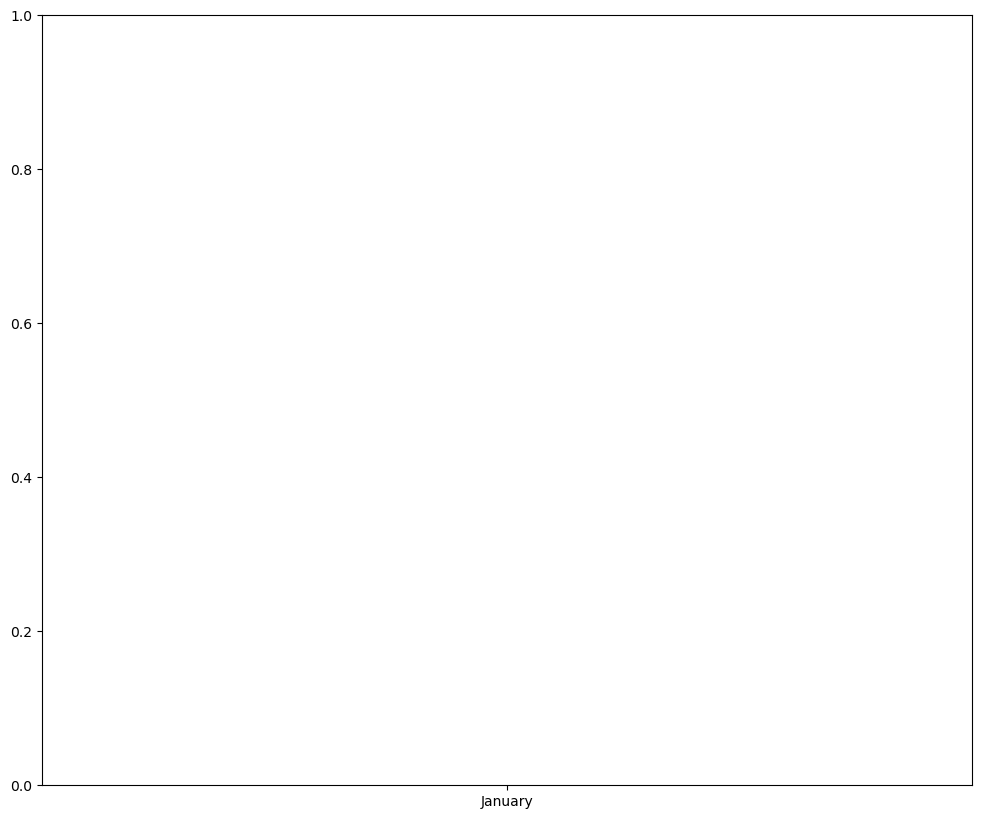

In [68]:
fig = plt.figure(figsize=(12, 10))

plt.plot(monthly_mean_chl['month'],monthly_mean_chl)

In [74]:
# Select chlorophyll variable from dataset
chl_da = chl_data["chlor_a"]  # Convert to xarray.DataArray

# Check for missing data
valid_data_count = np.count_nonzero(~np.isnan(chl_da.values))
if valid_data_count == 0:
    print("Warning: No valid chlorophyll data found!")
else:
    # Compute monthly mean (averaged over lat & lon)
    monthly_mean_chlor_a = chl_da.mean(dim=['lat', 'lon'], skipna=True)

# Convert month names to datetime format
months = monthly_mean_chlor_a['month'].values
time_series = pd.to_datetime(months, format='%B')  # Convert month names to datetime

# Plot time series
plt.figure(figsize=(10, 5))
plt.plot(time_series, monthly_mean_chlor_a, marker='o', color='blue', linewidth=2, label="Monthly Mean Chlorophyll-a")

# Formatting
plt.xlabel("Time (Months)")
plt.ylabel("Log-Transformed Chlorophyll-a (mg/m³)")
plt.title("Monthly Climatology of Log-Transformed Chlorophyll-a")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

KeyError: 'month'

In [82]:
# LOG TRANSFORM chlor_a and SLICE DATA
print(f"Min chlor_a: {chl_data['chlor_a'].min().values}")
print(f"Max chlor_a: {chl_data['chlor_a'].max().values}")
log_chlor_a = np.log10(chl_data['chlor_a'].sel(lon=slice(-85, -60), lat=slice(-58, -70)))
# Remove NaNs before finding max value
log_chlor_a_clean = log_chlor_a.where(~np.isnan(log_chlor_a), drop=True)
log_min = log_chlor_a_clean.min().values
log_max = log_chlor_a_clean.max().values
print(f"Min log chlor_a: {log_min}")
print(f"Max log chlor_a: {log_max}")


Min chlor_a: 0.0010000000474974513
Max chlor_a: 99.48895263671875
Min log chlor_a: -2.9987382888793945
Max log chlor_a: 1.8387300968170166


In [86]:
# Remove NaNs before finding max value
log_chlor_a_clean = log_chlor_a.where(~np.isnan(log_chlor_a), drop=True)

# Get the indices of the max log-transformed chlorophyll value
max_idx = log_chlor_a_clean.argmax(dim=["lat", "lon"])

# Extract the corresponding latitude and longitude
max_lat = log_chlor_a_clean.lat[max_idx["lat"].values].values
max_lon = log_chlor_a_clean.lon[max_idx["lon"].values].values

print(f"Max log chlor_a at lat: {max_lat}, lon: {max_lon}")

Max log chlor_a at lat: [-67.4375     -69.10416667 -68.35416667 -65.72916667 -61.02083333
 -67.8125     -68.14583333 -62.60416667 -68.85416667], lon: [-68.02083333 -68.4375     -67.22916667 -67.14583333 -71.6875
 -75.72916667 -74.1875     -60.64583333 -67.72916667]


In [88]:
# CALCULATE MONTHLY CHLOROPHYLL, AVERAGED OVER LAT AND LON OF SPECIFIC REGION
monthly_mean_chlor_a = log_chlor_a.mean(dim=['lat', 'lon']) # Take average across lat and lon


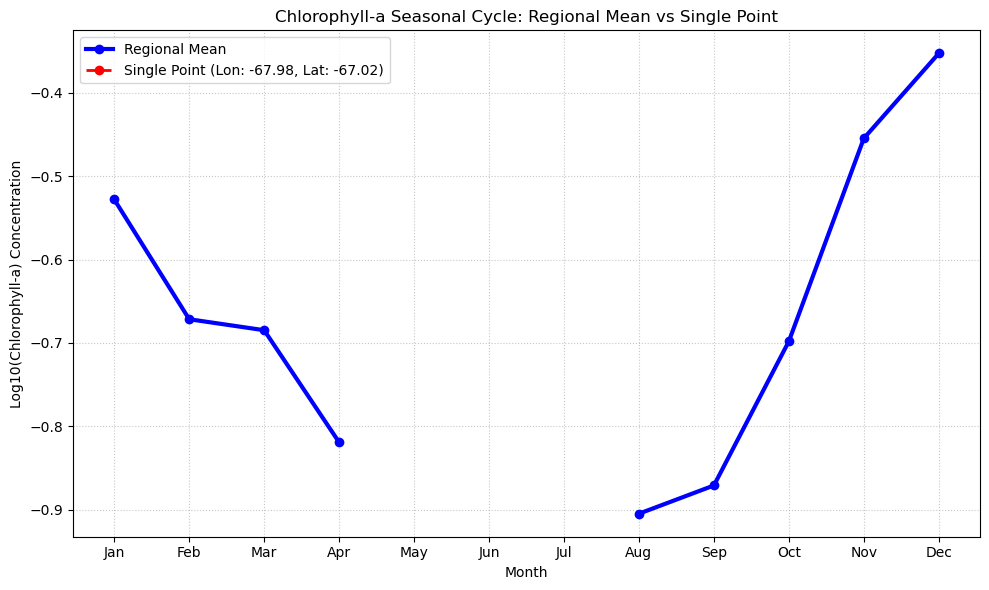

In [107]:
def plot_chlor_a_timeseries(chl_data):
    # Log transform chlor_a for specified region
    log_chlor_a = np.log10(chl_data['chlor_a'].sel(lon=slice(-85, -60), lat=slice(-58, -70)))
    
    # Calculate monthly mean for the entire region
    monthly_mean_chlor_a = log_chlor_a.mean(dim=['lat', 'lon'])
    
    # Select a single point near high chlorophyll area
    single_point_chlor_a = log_chlor_a.sel(lon=-68, lat=-67, method='nearest')
    
    # Reorder months to start from January
    month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    
    # Create a mapping of original time values to reordered months
    reordered_mean_data = []
    reordered_single_point = []
    
    for month_name in month_order:
        # Find the index of the current month
        month_index = [i for i, time in enumerate(monthly_mean_chlor_a.time.dt.strftime('%b').values) 
                       if time == month_name][0]
        
        reordered_mean_data.append(monthly_mean_chlor_a[month_index])
        reordered_single_point.append(single_point_chlor_a[month_index])
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(month_order, reordered_mean_data, 
             label='Regional Mean', linewidth=3, color='blue', marker='o')
    plt.plot(month_order, reordered_single_point, 
             label=f'Single Point (Lon: {single_point_chlor_a.lon.values:.2f}, Lat: {single_point_chlor_a.lat.values:.2f})', 
             linewidth=2, color='red', linestyle='--', marker='o')
    
    plt.title('Chlorophyll-a Seasonal Cycle: Regional Mean vs Single Point', fontsize=12)
    plt.xlabel('Month', fontsize=10)
    plt.ylabel('Log10(Chlorophyll-a) Concentration', fontsize=10)
    plt.legend()
    plt.grid(True, linestyle=':', alpha=0.7)
    
    plt.tight_layout()
    plt.show()

# Call the function
plot_chlor_a_timeseries(chl_data)

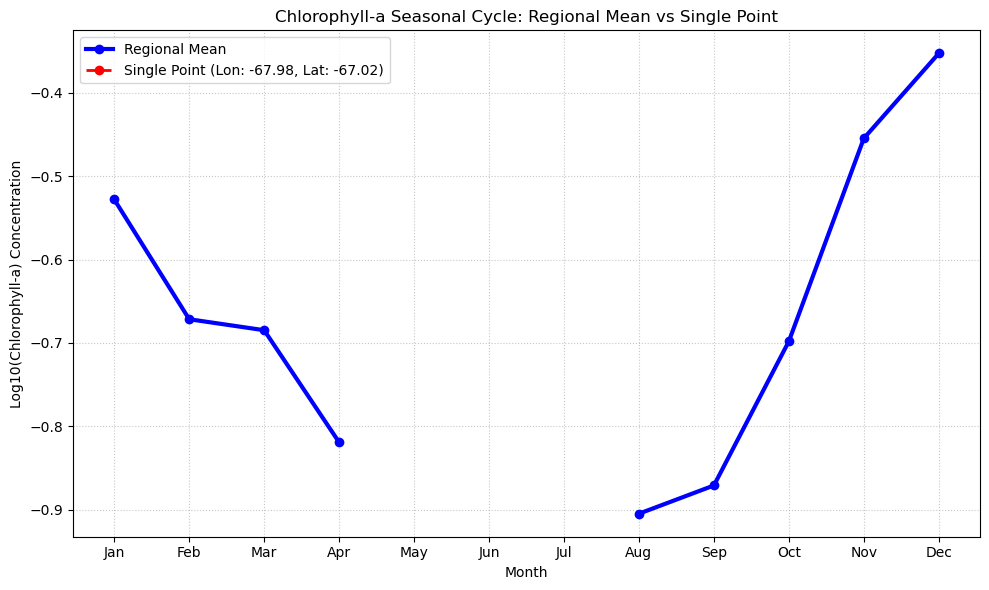

In [118]:
def plot_chlor_a_timeseries(chl_data):
    # Log transform chlor_a for specified region
    log_chlor_a = np.log10(chl_data['chlor_a'].sel(lon=slice(-85, -60), lat=slice(-58, -70)))
    
    # Calculate monthly mean for the entire region
    regional_mean = log_chlor_a.groupby('time.month').mean(dim=['lat', 'lon'])
    
    # Select a single point near high chlorophyll area
    single_point = log_chlor_a.sel(lon=-68, lat=-67, method='nearest')
    
    # Calculate monthly mean for the single point
    single_point_mean = single_point.groupby('time.month').mean()
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 13), regional_mean.values, 
             label='Regional Mean', linewidth=3, color='blue', marker='o')
    plt.plot(range(1, 13), single_point_mean.values, 
             label=f'Single Point (Lon: {single_point.lon.values:.2f}, Lat: {single_point.lat.values:.2f})', 
             linewidth=2, color='red', linestyle='--', marker='o')
    
    plt.title('Chlorophyll-a Seasonal Cycle: Regional Mean vs Single Point', fontsize=12)
    plt.xlabel('Month', fontsize=10)
    plt.ylabel('Log10(Chlorophyll-a) Concentration', fontsize=10)
    plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.legend()
    plt.grid(True, linestyle=':', alpha=0.7)
    
    plt.tight_layout()
    plt.show()

# Call the function
plot_chlor_a_timeseries(chl_data)

In [120]:
print("Single Point Mean Values:", single_point_mean.values)
print("Single Point Mean Shape:", single_point_mean.shape)
print("Single Point Mean Coordinates:", single_point_mean.coords)

NameError: name 'single_point_mean' is not defined

Exact Longitude: -67.97916666666667
Exact Latitude: -65.02083333333331


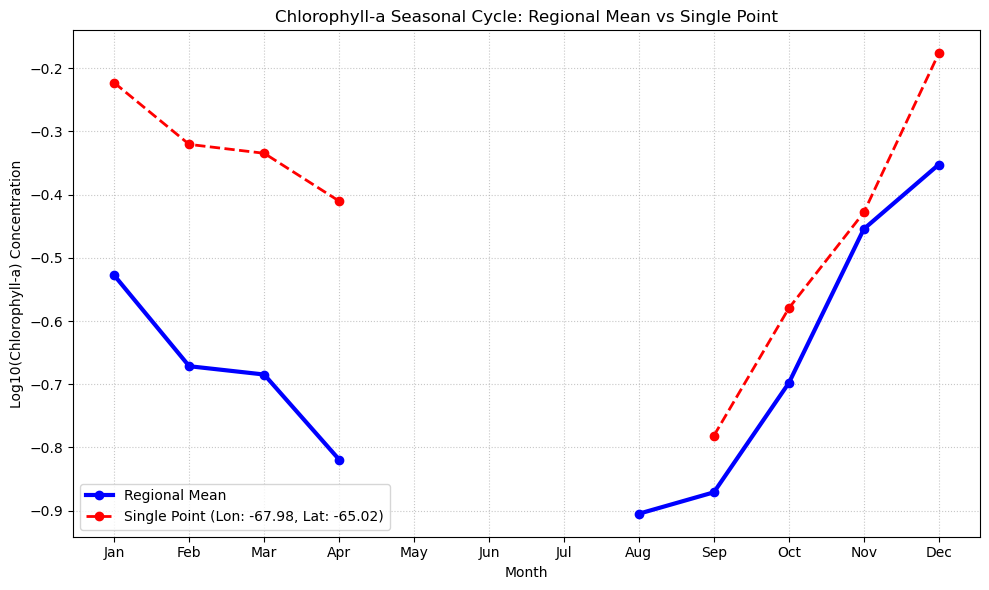

In [132]:
def plot_chlor_a_timeseries(chl_data):
    # Log transform chlor_a for specified region
    log_chlor_a = np.log10(chl_data['chlor_a'].sel(lon=slice(-85, -60), lat=slice(-58, -70)))
    
    # Calculate monthly mean for the entire region
    regional_mean = log_chlor_a.groupby('time.month').mean(dim=['lat', 'lon'])

    # Select a single point near high chlorophyll area
    single_point = log_chlor_a.sel(lon=-68, lat=-65, method='nearest')
    # Print the exact coordinates
    print(f"Exact Longitude: {single_point.lon.values}")
    print(f"Exact Latitude: {single_point.lat.values}")
    
    # Calculate monthly mean for the single point
    single_point_mean = single_point.groupby('time.month').mean()
  
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 13), regional_mean.values, 
             label='Regional Mean', linewidth=3, color='blue', marker='o')
    plt.plot(range(1, 13), single_point_mean.values, 
             label=f'Single Point (Lon: {single_point.lon.values:.2f}, Lat: {single_point.lat.values:.2f})', 
             linewidth=2, color='red', linestyle='--', marker='o')
    
    plt.title('Chlorophyll-a Seasonal Cycle: Regional Mean vs Single Point', fontsize=12)
    plt.xlabel('Month', fontsize=10)
    plt.ylabel('Log10(Chlorophyll-a) Concentration', fontsize=10)
    plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.legend()
    plt.grid(True, linestyle=':', alpha=0.7)
    
    plt.tight_layout()
    plt.show()

# Call the function
plot_chlor_a_timeseries(chl_data)

In [ ]:
#Latitude values:

#Max log chlor_a at lat: [-67.4375     -69.10416667 -68.35416667 -65.72916667 -61.02083333
 #-67.8125     -68.14583333 -62.60416667 -68.85416667], lon: [-68.02083333 -68.4375     -67.22916667 -67.14583333 -71.6875
 #-75.72916667 -74.1875     -60.64583333 -67.72916667]
